<div style="display: flex; align-items: center;">
    <img src="pictures/dira_logo.png" width="50" style="margin-right: 15px;"/>
    <h1>Dira: ProSuite</h1>
</div>

### Welcome to the Step-by-Step Guide

This notebook will guide you through running Quality Assurance (QA) checks and XML verifications with ProSuite in a simple, step-by-step approach. Each cell contains clear instructions and code that you can run directly. You need to first run once the cells of the definiton Part of the script starting here: [Execute cells starting here](#definitions-no-user-changes-required)  




### How to Use This Notebook:
1. **Read Each Instruction Carefully**: Each step includes a description of what the code does and any specific actions required.
2. **Adjust Variables if Needed**: In some cells, there may be variables you need to modify (like file paths or QA check types). Follow the instructions provided in the text above each code cell to know exactly what to adjust.
3. **Run Cells Sequentially**: Move now through each cell in order (after executing the definition cells first), running them as you go. This ensures all necessary configurations are set up properly.

This approach will make it easy to understand and adapt the code to your own data or needs. Let’s get started!

### Table of Contents

1. [Imports and Setup](#Prerequisites)  </p>
      Set the Path to Your Dataset<br>
      Service Connection<br>
      Start the ProSuite QA Microservice<br>
      Connecting to the ProSuite QA Service<br>

4. [Performing a QA Check](#Finally:-Ready-to-Perform-a-QA-Check)  </p>
      Defining the QA Check Parameters<br>
      Running the QA Check<br>

5. [QA Mapping and Issue Summary](#qa-mapping-and-issue-summary)  </p>
      List Available Layers<br>
      Select Layers to Load<br>
      Display the Issue Summary Table<br>
      Generate Interactive Map<br>

6. [Definitions (No User Changes Required)](#definitions-no-user-changes-required)  
      QA Check Functions<br>
      Run Verification Function<br>
      Helper Functions<br>



## Prerequisites
1. **Set Up a Python Environment**

   You have two options for setting up the environment:

    **Option A: Create a Fresh Python Environment**

   To create a new Python environment using Conda, follow these steps:

   Open a terminal or command prompt.
   Run the following command to create a new environment with Python 3.9:

   ```bash
   conda create --name qa_env python=3.x
   conda activate qa_env
   conda env update --file environment.yml
   ```
   This will install all the required dependencies specified in the environment.yml file for you.
   

   **Option B: Use an Existing Python Environment**<br>
   
      If you prefer to use your existing Python environment, you can manually install the required packages. Here’s how:

      Make sure your environment is active.

      Install the required packages using Conda. Run the following commands:
      ```bash
      conda install -c conda-forge jupyterlab 
      conda install -c conda-forge ipywidgets 
      conda install -c conda-forge pandas 
      conda install -c conda-forge geopandas 
      #Add any other packages needed for your project
      conda activate qa_env
      ```
2. **Select your prepeared environment**
      ```bash
      conda activate qa_env
      ```

In [35]:
import arcpy
import prosuite as ps
import os
from datetime import datetime
import time
import subprocess
import socket
import sys
import fiona
import geopandas as gpd
import subprocess
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import box

ModuleNotFoundError: No module named 'geopandas'

3. **Set the Path to Your Dataset**

   To use geospatial data (`.gdb`), you have two options:

   - **Option 1: Using Your Own Dataset**  
     - Specify the path to your dataset in the script:
       - Make sure your script points to the correct file path of your geospatial data (e.g., `C:/path_to_your_data/your_data.gdb`).

   - **Option 2: Downloading the Sample Dataset from ProSuite**  
     - **Download the Sample Dataset**:
       - Visit the xxxxxx page.
       - Download and extract the dataset (e.g., to `C:/ProSuiteSampleData/`).
     - **Adjust the Path in Your Script**:
       - After extracting, update your script to point to the sample dataset’s `.gdb` file location (e.g., `C:/ProSuiteSampleData/sample_data.gdb`).


In [46]:
# Toggle to choose between GDB and SDE
use_gdb = True  # Set to False to use the SDE file

gdb_path = r"C:\DIRA\SampelData\TLM_I.gdb"  # Replace with your geodatabase path
sde_path = r"C:\DIRA\BKG\Arcgis\BKG_allowerror\PostgreSQL-localhost-EGDB(postgres).sde" # Replace with your SDE connection file
output_dir = r"C:\DIRA\Output"  # Replace with the path to your desired output directory


model_path = gdb_path if use_gdb else sde_path  # Choose the correct path based on the toggle

available_layers = list_layers_in_database(model_path)
print(f"Available layers in Model GDB/SDE: {available_layers}")

if verify_paths(model_path, output_dir):
    # Initialize the model based on the file type
    if use_gdb:
        print(f"Using GDB file: {model_path}")
        model = ps.Model("TopoModel", model_path)  # Replace "TopoModel" with your specific model name
    else:
        print(f"Using SDE file: {model_path}")
        model = ps.Model("EnterpriseTopoModel", model_path)  # Replace "EnterpriseTopoModel" with your specific model name

    # Proceed with the rest of your workflow
    print(f"Successfully initialized model: {model}")
else:
    print("Path verification failed. Please check your inputs.")

Available layers in Model GDB/SDE: ['TLM_AREALE_I\\TLM_VERKEHRSAREAL_I', 'TLM_AREALE_I\\TLM_NUTZUNGSAREAL_I', 'TLM_AREALE_I\\TLM_FREIZEITAREAL_I', 'TLM_BAUTEN_I\\TLM_GEBAEUDEKOERPER_I', 'TLM_BAUTEN_I\\TLM_SCHNITTLINIE_I', 'TLM_BAUTEN_I\\TLM_DACH_GRUNDRISS_I', 'TLM_BAUTEN_I\\TLM_VERSORGUNGS_BAUTE_PLY_I', 'TLM_BAUTEN_I\\TLM_GEBAEUDEEINHEIT_I', 'TLM_BAUTEN_I\\TLM_SPORTBAUTE_LIN_I', 'TLM_BAUTEN_I\\TLM_VERBAUUNG_I', 'TLM_BAUTEN_I\\TLM_VERSORGUNGS_BAUTE_LIN_I', 'TLM_BAUTEN_I\\TLM_STAUBAUTE_I', 'TLM_BAUTEN_I\\TLM_SPORTBAUTE_PLY_I', 'TLM_BAUTEN_I\\TLM_DACH_I', 'TLM_BAUTEN_I\\TLM_GEBAEUDE_I', 'TLM_BAUTEN_I\\TLM_MAUER_I', 'TLM_BAUTEN_I\\TLM_LEITUNG_I', 'TLM_BAUTEN_I\\TLM_VERSORGUNGS_BAUTE_PKT_I', 'TLM_BAUTEN_I\\TLM_MAST_I', 'TLM_BAUTEN_I\\TLM_VERKEHRSBAUTE_PLY_I', 'TLM_BAUTEN_I\\TLM_GRUNDRISS_I', 'TLM_BAUTEN_I\\TLM_VERKEHRSBAUTE_LIN_I', 'TLM_BAUTEN_I\\TLM_GRUNDRISS_AV_V25_I', 'TLM_BAUTEN_I\\TLM_ABZUGSKOERPER_I', 'TLM_BB_I\\TLM_MORPH_KLEINFORM_PKT_I', 'TLM_BB_I\\TLM_MORPH_KLEINFORM_LIN_I', 'TLM_B

 4. **Start the ProSuite QA Microservice**

    You have two options to start the ProSuite microservice:

    - **Start Manually**:
      - Navigate to the folder where the `prosuite-qa-microservice.exe` is located.
      - Double-click the `.exe` file to start the service.

    - **Start via Script**:
      - Alternatively, you can start the service programmatically using Python. Update the file path in the script to the location where your `prosuite-qa-microservice.exe` is stored (typically:      
        "C:\ ... \Dira.ProSuiteSolution\binServer_x64\Debug\prosuite-qa-microservice.exe"):

In [41]:
# Check if the service is running
if not is_service_running():
    print("Starting the ProSuite service...")
    try:
        # The path to your executable
        exe_path = r"C:\git\Dira.ProSuiteSolution\binServer_x64\Debug\prosuite-qa-microservice.exe"

        # Check if the exe path exists
        if not os.path.exists(exe_path):
            print(f"Error: Executable not found at {exe_path}")
        else:
            # Open cmd.exe and run the executable
            subprocess.Popen(['cmd.exe', '/k', exe_path], creationflags=subprocess.CREATE_NEW_CONSOLE)

            print("ProSuite service started in a new command window.")
    except PermissionError as e:
        print(f"PermissionError: {e}")
    except Exception as e:
        print(f"Error starting ProSuite service: {e}")
else:
    print("Skipping service start as it's already running.")

ProSuite service is already running at localhost:5151.
Skipping service start as it's already running.


5. **Connecting to the ProSuite QA Service**

    After verifying that the ProSuite QA microservice is running, establish a connection to it. 
    By default the communication channel is localhost:5151.

In [42]:
service = create_service('localhost', 5151)  # Adjust host and port if needed

if service:
    # Proceed with your QA checks if the service is created successfully
    print("Ready to run QA checks.")
else:
    print("Cannot proceed without connecting to the ProSuite service.")

Successfully connected to the ProSuite service on localhost:5151
Ready to run QA checks.


### Finally: Ready to Perform a QA Check

In this section, the user runs a Quality Assurance (QA) check by specifying the type of check via Quality Specifcation (also possible with GUI_QA_Generator), XML File or DDX-File (Not implemented yet) and defining a geographic perimeter ore defining the path to a shp file to use as an `EnvelopePerimeter`.

#### Key Steps:

1. **Deciding Between Shapefile Input or Manually Defined Perimeter**:
   - The user has the option to either:
     - Use a **Shapefile** to define the geographic perimeter.
     - Manually define the perimeter using coordinates (`x_min`, `y_min`, `x_max`, `y_max`).
   - **`use_shapefile`**: A boolean flag that determines whether to load a perimeter from a Shapefile (`True`) or define it directly (`False`).

2. **Choosing the Check Type**: 

    You have several options for selecting the type of quality check you want to perform:

- **`use_specification`**: 
  - You can add manually Specifications in select_and_run_qa_check function
  - Alternativly, you can generate the required code for a specification quality check using the **GUI QA Generator** file.
  - The tool provides a interface where you can configure and generate the code for various types of quality checks.
  - **`use_specification`**: A boolean flag that determines if user wants to use specification for quality check (`True`).

- **`use_xml_file`**: 
  - This option allows you to use an XML file as input for the quality check. 
  - You can find a detailed example on the Dira website: [Dira GeoSystems XML Specification Guide](https://www.dirageosystems.ch/prosuite/doc/api/xmlspec.html).
  - **`use_xml_file`**:  A boolean flag that determines if user wants to use XML FIle for quality check (`True`).

- **`use_ddx`**: 
  - Input is based on specifications from the datadictionaryeditor. 
  - More details will be defined later.

Choose the appropriate check type based on your requirements and proceed with the relevant input format.


In [48]:
check_type = 'min_length'  # Decide wich QA-Check you want to run. Options: 'min_length', 'segment_length', etc.

# User input
use_shapefile = False  # Set to False if the user wants to define the envelope directly
use_specification = True # Set to True if the user wants to verify using an specification file, otherwise set to False for QA check
use_xml_file = False  # Set to True if the user wants to verify using an XML file, otherwise set to False for QA check
use_ddx = False  # Set to True if the user wants to use a DDX file for the QA check, otherwise set to False
shapefile_path = 'C:.....'  # The user provides the shapefile path if use_shapefile is True

# Has to be set if use_shapefile is False: 
envelope_coordinates = {
    'x_min': 2750673,
    'y_min': 1215551,
    'x_max': 2765845,
    'y_max': 1206640
}  # Define geographic perimeter

# Has to be set if use_xml_file is True:
xml_file_path = 'C:\\DIRA\\SampelData\\XML\\sample.xml' 
 # Path to the XML file if use_xml_file is True 

workspace  = 'C:\\DIRA\\connection_files\\production_QA_version.gdb'  # Path to the .gdb workspace

output_dir_with_timestamp = None

if use_shapefile:
    envelope = load_envelope_from_shapefile(shapefile_path)
else:
    envelope = ps.EnvelopePerimeter(**envelope_coordinates)
# Determine which process to run based on the boolean flag
if use_xml_file:
    try:
        # XML-based verification
        xml_spec = ps.XmlSpecification(
            specification_file=xml_file_path,
            specification_name="Produktionsunterstützung",  # Ensure this matches your XML
            data_source_replacements=[["TLM_I", model_path]]  # Correct GDB and workspace mapping
        )
        
        # Run the XML verification using the updated run_verification function
        run_verification(xml_spec, output_dir, envelope)

    except Exception as e:
        print(f"Failed to read XML specification or run verification: {e}")


elif use_ddx:
    # # Proceed to read and verify using the DDX file
    # try:
    #     specifications_df = service.get_specifications()
    #     specifications_df #dataframe anschauen

    #     ddx_spec = prosuite.DdxSpecification(
    #         ddx_file=ddx,
    #         data_source_replacements=[["ProductionModel", workspace]]
    #     )
        
    #     verification_responses = service.verify(specification=ddx_spec, output_dir=output_dir)
    #     for verification_response in verification_responses:
    #         print(verification_response.message)
    
    # except Exception as e:
    #     print(f"Failed to read DDX specification or run verification: {e}")

    #run_verification(DdxSpecification(ddx_id=2868), output_dir, envelope)

    print("DDX not implemented yet.")
elif use_specification:
# Call the selected check
    datasets = [
        ps.Dataset("TLM_FLIESSGEWAESSER_I", model),  # Adjust feature names as neede          # Adjust feature names as needed
    ]
    select_and_run_qa_check(check_type, model, datasets, output_dir, envelope)

Creating external issue file geodatabase
Status: Running
Server accessible, code running
Starting quality verification using quality specification MinimumLengthSpecification with verification tile size 5000Extent: 15172 x 8911
  X-Min: 2750673
  Y-Min: 1206640
  X-Max: 2765845
  Y-Max: 1215551

Status: Running
Server accessible, code running
Verifying quality conditions per cached tiles (container tests)
Status: Running
Server accessible, code running
  Processing tile 0 of 8: XMin: 2 750 673,00 YMin: 1 206 640,00 XMax: 2 755 673,00 YMax: 1 211 640,00
Status: Running
Server accessible, code running
  Processing tile 1 of 8: XMin: 2 755 673,00 YMin: 1 206 640,00 XMax: 2 760 673,00 YMax: 1 211 640,00
Status: Running
Server accessible, code running
  Processing tile 2 of 8: XMin: 2 760 673,00 YMin: 1 206 640,00 XMax: 2 765 673,00 YMax: 1 211 640,00
Status: Running
Server accessible, code running
  Processing tile 3 of 8: XMin: 2 765 673,00 YMin: 1 206 640,00 XMax: 2 765 845,00 YMax: 1 211

### QA Mapping and Issue Summary

This tool generates an interactive map and summary table for the solution of the Quality Assurance.


 **Step 1:** List Available Layers in the GDBs
 
This cell dynamically lists the available layers from the `Issues.gdb` and your `model.gdb`. 
After running this cell, the available layers will be printed, allowing you to choose which layers you want to load.


In [35]:
# Paths to GDB files
issue_gdb_path = os.path.join(output_dir_with_timestamp, "Issues.gdb")
 # Replace with actual model GDB path

# List available layers in the Issue GDB
available_issue_layers = list_layers_in_gdb(issue_gdb_path)
print(f"Available layers in Issues GDB: {available_issue_layers}")

# List available layers in the Model GDB
available_model_layers = list_layers_in_gdb(model_path)
print(f"Available layers in Model GDB: {available_model_layers}")


Available layers in Issues GDB: ['IssueRows', 'IssuePolygons', 'IssueLines', 'IssuePoints', 'IssueMultiPatches', 'IssueStatistics', 'AreaOfInterest']
Available layers in Model GDB: ['TLM_AREALE_NAME_I', 'TLM_AREALE_NAMENSTEIL_I', 'TLM_BAUTEN_NAME_I', 'TLM_BAUTEN_NAMENSTEIL_I', 'TLM_BB_NAMENSTEIL_I', 'TLM_BB_NAME_I', 'TLM_EO_NAME_I', 'TLM_EO_NAMENSTEIL_I', 'TLM_FAEGROUTE_I', 'TLM_VERSION', 'GEWISS_REGION', 'TLM_SCHULE_I', 'TLM_GEBAEUDENUTZUNG_I', 'TLM_STROMTRASSE_I', 'TLM_GLAMOS_I', 'TLM_GEWAESSER_NAME_I', 'TLM_GEWAESSER_LAUF_I', 'TLM_GEWAESSER_REFERENZORT_I', 'TLM_GRENZEN_NAME_I', 'TLM_NAMEN_NAME_I', 'TLM_OEV_NAME_I', 'TLM_STRASSEN_NAME_I', 'TLM_FAEGWEG_I', 'TLM_MTBROUTE_I', 'TLM_MTBWEG_I', 'TLM_STRASSENROUTE_I', 'TLM_VELOROUTE_I', 'TLM_VELOWEG_I', 'TLM_WANDERROUTE_I', 'TLM_WANDERWEG_I', 'TLM_STRASSE_AVS_I', 'TLM_GEWAESSER_NAMENSTEIL_I', 'TLM_GRENZEN_NAMENSTEIL_I', 'TLM_NAMEN_NAMENSTEIL_I', 'TLM_OEV_NAMENSTEIL_I', 'TLM_STRASSEN_NAMENSTEIL_I', 'TLM_VERKEHRSAREAL_I', 'TLM_NUTZUNGSAREAL_I

 **Step 2:** Select the Layers You Want to Load
 
In this cell, specify which layers to load from the Issue_GDB files based on the available options printed in the previous step. Replace the values in `selected_issue_layer` and `selected_model_layers` with the names of the layers you want to load.


In [96]:
# Specify which layers to load
selected_issue_layer = "IssueLines"  # Specify the layer from the available_issue_layers
selected_model_layers = ["TLM_FLIESSGEWAESSER_I", "TLM_STRASSE_I"]  # Specify layers from available_model_layers
issue_gdf = gpd.read_file(issue_gdb_path, layer=selected_issue_layer)


 **Step 3:** Select Columns to Display in the Issue Table
 
This cell lists the non-empty columns in the selected issue layer. You can then specify which columns you want to display in the next cell.


In [97]:
def get_non_empty_columns(gdf):
    return [col for col in gdf.columns if gdf[col].notna().any()]

# List non-empty columns in the issue GDB
available_columns = get_non_empty_columns(issue_gdf)
print(f"Available columns in the selected issue layer: {available_columns}")

Available columns in the selected issue layer: ['Description', 'Code', 'CodeDescription', 'InvolvedObjects', 'QualityCondition', 'TestName', 'TestDescription', 'TestType', 'IssueType', 'StopCondition', 'Category', 'AffectedComponent', 'QualityConditionUuid', 'QualityConditionVersionUuid', 'SHAPE_Length', 'geometry']


**Step 4:** Display the Issue Summary Table
This cell displays the selected columns from the issue GDB in a table. The column names will be automatically formatted to be more user-friendly.


In [98]:
# Specify columns to display
selected_columns = ["Description", "Code", "TestName", "Status"]  # Specify columns from available_columns

# Display the selected columns from the issue GDB
error_summary_df = issue_gdf[selected_columns].copy()
error_summary_df.columns = [col.replace("_", " ").title() for col in selected_columns]

# Display the table
display(error_summary_df)

,Description,Code,Testname,Status
0,No neighboring feature found within 5,MustBeNear.NoFeatureWithinDistance,QaMustBeNearOther(0),None
1,No neighboring feature found within 5,MustBeNear.NoFeatureWithinDistance,QaMustBeNearOther(0),None
2,No neighboring feature found within 5,MustBeNear.NoFeatureWithinDistance,QaMustBeNearOther(0),None
3,No neighboring feature found within 5,MustBeNear.NoFeatureWithinDistance,QaMustBeNearOther(0),None


**Step 5:** Print interactive map

The map includes markers for the issues and draws geometries for the selected model layers for orientation and understanding.


In [99]:
if use_shapefile == False:
    envelope = box(
        envelope_coordinates['x_min'],
        envelope_coordinates['y_min'],
        envelope_coordinates['x_max'],
        envelope_coordinates['y_max']
    )

def load_layer_from_gdb(gdb_path, layer_name):
    return gpd.read_file(gdb_path, layer=layer_name)

# Load the selected issue layer
issue_gdf = load_layer_from_gdb(issue_gdb_path, selected_issue_layer)

# Load the selected model layers
loaded_layers = {}

for layer in selected_model_layers:
    loaded_layers[layer] = load_layer_from_gdb(model_path, layer)
# Function to reproject to WGS 84 if necessary
def reproject_to_wgs84(gdf):
    if gdf.crs != "EPSG:4326":
        return gdf.to_crs("EPSG:4326")
    return gdf

# Reproject the Issue and model layers to WGS 84

issue_gdf = reproject_to_wgs84(issue_gdf)
for layer, gdf in loaded_layers.items():
    loaded_layers[layer] = reproject_to_wgs84(gdf)

# Reproject the envelope
envelope_gdf = gpd.GeoDataFrame(gpd.GeoSeries(envelope), columns=['geometry'], crs="EPSG:2056").to_crs("EPSG:4326")
envelope_wgs84 = envelope_gdf.geometry.iloc[0]

# Clip features to the envelope (area of interest)
issue_gdf = issue_gdf[issue_gdf.geometry.intersects(envelope_wgs84)]
for layer, gdf in loaded_layers.items():
    loaded_layers[layer] = gdf[gdf.geometry.intersects(envelope_wgs84)]
    loaded_layers[layer] = loaded_layers[layer][loaded_layers[layer].geometry.notna()]  # Filter rows with valid geometries

# Define map center
map_center = issue_gdf.geometry.unary_union.centroid
m = folium.Map(location=[map_center.y, map_center.x], zoom_start=13)

# Add markers for issues
marker_cluster = MarkerCluster().add_to(m)
for idx, row in issue_gdf.iterrows():
    if row.geometry and not row.geometry.is_empty:
        centroid = row.geometry.centroid
        coords = [centroid.y, centroid.x]
        popup_content = f"""
        <strong>Description:</strong> {row.get('Description', 'N/A')}<br>
        <strong>Code:</strong> {row.get('Code', 'N/A')}<br>
        <strong>Test Name:</strong> {row.get('TestName', 'N/A')}<br>
        <strong>Status:</strong> {row.get('Status', 'N/A')}
        """
        popup = folium.Popup(popup_content, max_width=300)
        folium.Marker(location=coords, popup=popup).add_to(marker_cluster)

# Add user-selected layers to the map
for layer_name, gdf in loaded_layers.items():
    for _, feature in gdf.iterrows():
        if feature.geometry and not feature.geometry.is_empty:
            folium.GeoJson(
                feature.geometry,
                style_function=lambda x: {"color": "blue", "weight": 2},
                tooltip=layer_name
            ).add_to(m)

# Display the map
display(m)


#### Function: `select_and_run_qa_check`

This function lets you run various QA checks based on the `check_type` provided.

**Key Parameters:**
- **`check_type`**: The type of QA check (e.g., `min_length`, `segment_length`...).
- **`model`**: The data model.
- **`datasets`**: The datasets to check.
- **`output_dir`**: The directory for the output.
- **`envelope`**: The geographic area for the check.


Attention, for the GUI generated code it needs no `dataset` attribut when calling the funktion elif ````check_type == 'near_check':
        near_check(model, output_dir, envelope)```` because the dataset it specified in the gui


**If you generate a Specification Qualtiy Check with the GUI you have to insert the code below ---QA Check---. Add also a elif to call the new QA Check**




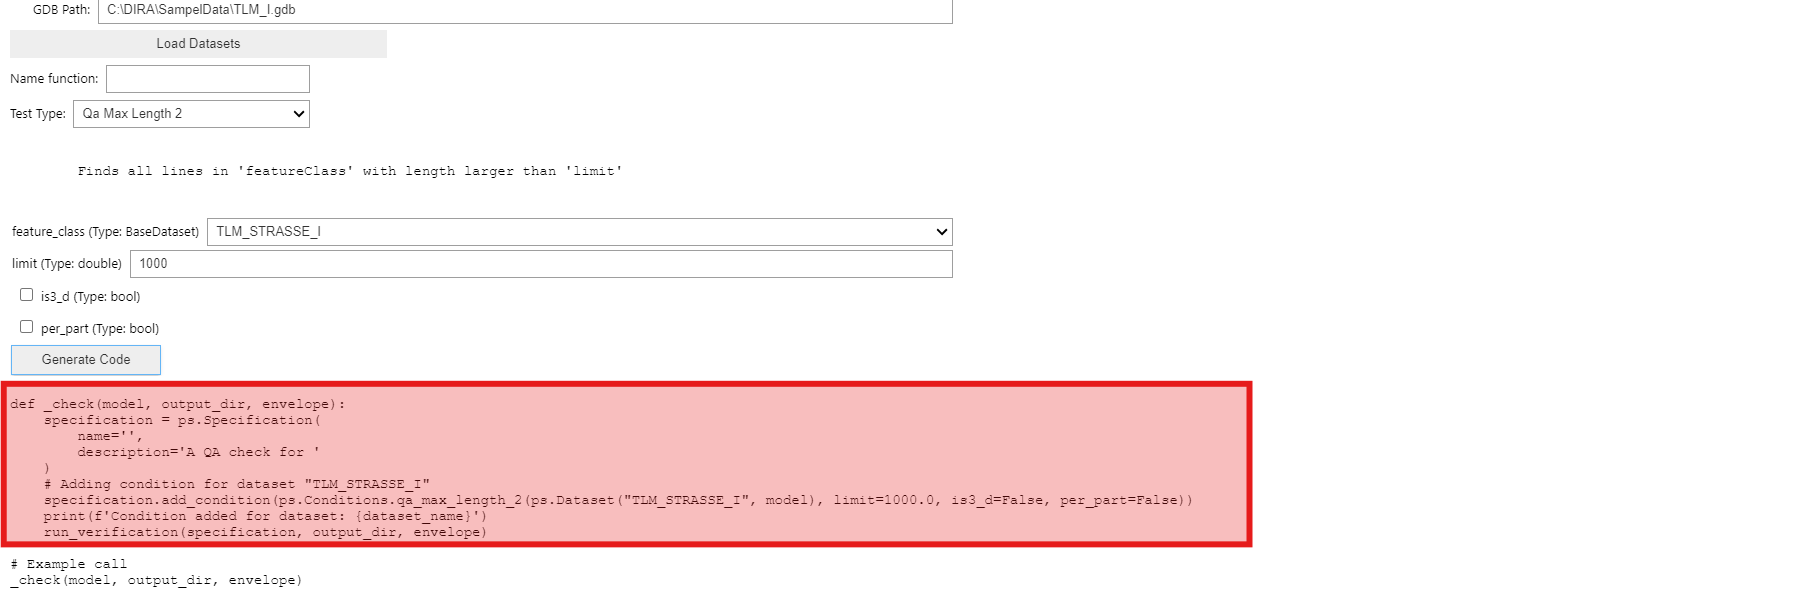


In [44]:
def select_and_run_qa_check(check_type, model, gdb_path, output_dir, envelope):
    """Select the QA check to run based on the check_type and loaded datasets."""
    
    if check_type == 'min_length':
        qa_min_length_check(model, datasets, output_dir, envelope)
    elif check_type == 'maxlength_check':
        maxlength_check(model, output_dir, envelope)
    elif check_type == 'near_check':
        near_check(model, output_dir, envelope)
    #elif ... == '...':
    #    ...(model, output_dir, envelope)
        #elif ... == '...':
    #    ...(model, output_dir, envelope)
    else:
        print(f"Unknown check type: {check_type}")

#------------------------ QA CHECKS ------------------------

def qa_min_length_check(model, datasets, output_dir, envelope):
    specification = ps.Specification(
        name='MinimumLengthSpecification',
        description='A QA check for minimum feature length of roads and rivers.'
    )
    
    # Iterate through the datasets list
    for dataset in datasets:
        specification.add_condition(ps.Conditions.qa_min_length_0(dataset, limit=1000, is3_d=False))

    run_verification(specification, output_dir, envelope)

def qa_segment_length_check(model, datasets, output_dir, envelope):
    specification = ps.Specification(
        name='SegmentLengthSpecification',
        description='A QA check for segment length of roads and rivers.'
    )
    
    for dataset_name, dataset in datasets.items():
        specification.add_condition(ps.Conditions.qa_segment_length_0(dataset, 1.5, False))
    
    run_verification(specification, output_dir, envelope)

def checkqa_check(model, datasets, output_dir, envelope):
    specification = ps.Specification(
        name='SegmentLengthSpecification',
        description='A QA check for segment length of roads and rivers.'
    )
    
    # Access the specific dataset by its name, e.g., "TLM_AREALE_NAME_I"
    dataset = datasets.get("TLM_AREALE_NAME_I")
    if dataset:
        specification.add_condition(ps.Conditions.qa_min_mean_segment_length_0(dataset, 6.0, False))
    
    run_verification(specification, output_dir, envelope)

def maxlength_check(model, output_dir, envelope):
    specification = ps.Specification(
        name='maxlength',
        description='A QA check for maxlength'
    )
    # Adding condition for dataset "TLM_VELOWEG_I"
    specification.add_condition(ps.Conditions.qa_max_length_2(ps.Dataset("TLM_STRASSE_I", model), limit=3.0, is3_d=False, per_part=False))
   # print(f'Condition added for dataset: {dataset_name}')

    run_verification(specification, output_dir, envelope)

def near_check(model, output_dir, envelope):
    specification = ps.Specification(
        name='near',
        description='A QA check for near'
    )
    specification.add_condition(ps.Conditions.qa_must_be_near_other_0(ps.Dataset("TLM_STRASSE_I", model), ps.Dataset("TLM_FLIESSGEWAESSER_I", model), 5.0, "", ""))
    run_verification(specification, output_dir, envelope)


#----------------you can add here the code generated by the GUI-------------------------------

---------------------------------------------------------------------------------------------------------------------------------------------------------
## Definitions (No User Changes Required)

From this point onward, the code contains function definitions that are fully implemented and **do not require any modifications by the user**. These functions handle the specific details of running the Quality Assurance (QA) checks, connecting to the ProSuite service, and managing the verification process.

#### Important Information:

- The most critical sections of the code where the user needs to interact or set parameters (such as the **check type**, **model**, **datasets**, **output directory**, and **geographic envelope**) have already been explained earlier.
- The functions below handle various QA checks and internal logic, ensuring that the verification process runs smoothly without further configuration.

Feel free to explore these functions to understand their purpose, but no changes are necessary unless you're adding new types of checks.

---------------------------------------------------------------------------------------------------------------------------------------------------------

#### Function: `run_verification(specification, output_dir, envelope)`

This function handles the process of connecting to the ProSuite service, running the verification with a specified quality assurance (QA) specification, and managing the verification output.



In [32]:
def run_verification(specification, output_dir, envelope):
    # Generate a timestamped directory for output
    global output_dir_with_timestamp  # Declare as global to use outside this function
    output_dir_with_timestamp = os.path.join(output_dir, f'output_{datetime.now().strftime("%Y%m%d_%H%M%S")}')
    os.makedirs(output_dir_with_timestamp, exist_ok=True)
    
    try:
        verification_responses = service.verify(
            specification=specification, 
            output_dir=output_dir_with_timestamp, 
            perimeter=envelope  # Pass envelope for spatial extent
        )
        
        issue_allowable = True  # This will control whether the process continues if non-allowable issues are found
        
        for verification_response in verification_responses:
            # Print general verification message
            print(verification_response.message)
            
            # Check for issues
            if len(verification_response.issues) > 0:
                for issue in verification_response.issues:
                    # Print issue details
                    print(issue.description)
                    print(issue.involved_objects)
                    print(issue.geometry)
                    print(issue.issue_code)
                    print(issue.allowable)
                    print(issue.stop_condition)

                    # If an issue is not allowable, stop the verification
                    if not issue.allowable:
                        print(f"Not allowed issue met: {issue.description} in {issue.involved_objects[1].table_name}")
                        print("Stopping verification")
                        issue_allowable = False
                        break

            # Break the outer loop if any non-allowable issue is found
            if not issue_allowable:
                break
            
            # Print the service call status
            print("Status: " + verification_response.service_call_status)

            # Handle different statuses
            if verification_response.service_call_status == "Failed":
                print("Server not accessible, check license")
                print("Verification Response:" + verification_response.message)
            elif verification_response.service_call_status == "Running":
                print("Server accessible, code running")
            elif verification_response.service_call_status == "Cancelled":
                print("Verification cancelled")
            elif verification_response.service_call_status == "Finished":
                print("Verification finished successfully")
            else:
                print("Undefined status")

    except Exception as e:
        print(f"Verification failed: {e}")
    
    return output_dir_with_timestamp


In [38]:
# def list_layers_in_gdb(model_path):
#     layers = fiona.listlayers(model_path)
#     #print(f"Layers in {model_path}: {layers}")
#     return layers
def list_layers_in_database(database_path):
    """
    Recursively lists all feature classes in the geodatabase, including those inside datasets.
    """
    arcpy.env.workspace = database_path
    all_feature_classes = []
    feature_datasets = arcpy.ListDatasets("", "Feature") or []

    for dataset in feature_datasets:
        dataset_path = os.path.join(database_path, dataset)
        arcpy.env.workspace = dataset_path
        dataset_feature_classes = arcpy.ListFeatureClasses() or []
        all_feature_classes.extend([os.path.join(dataset, fc) for fc in dataset_feature_classes])

    arcpy.env.workspace = database_path
    standalone_feature_classes = arcpy.ListFeatureClasses() or []
    all_feature_classes.extend(standalone_feature_classes)

    return all_feature_classes

def verify_paths(model_path, output_dir):
    """
    Verifies if the specified model path and output directory exist.
    
    Parameters:
    - model_path (str): The path to the model (file or directory).
    - output_dir (str): The path to the output directory.
    
    Returns:
    - bool: True if both paths exist, False otherwise.
    """
    paths_exist = True
    
    if os.path.exists(model_path):
        print(f"✔️ Model path found: {model_path}")
    else:
        print(f"❌ Error: The model path '{model_path}' does not exist.")
        paths_exist = False
    
    if os.path.exists(output_dir):
        print(f"✔️ Output directory found: {output_dir}")
    else:
        print(f"❌ Error: The output directory '{output_dir}' does not exist.")
        paths_exist = False
    
    return paths_exist

In [31]:
def is_service_running(host='localhost', port=5151):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        try:
            s.connect((host, port))
            print(f"ProSuite service is already running at {host}:{port}.")
            return True
        except ConnectionRefusedError:
            return False

In [27]:
def create_service(host_name, port_nr):
    """
    Creates a connection to the ProSuite QA service and provides feedback on success or failure.
    
    :param host_name: The hostname of the ProSuite QA service.
    :param port_nr: The port number used by the service.
    :return: A ProSuite service object or None if the connection fails.
    """
    try:
        # Attempt to create the service instance
        service = ps.Service(host_name=host_name, port_nr=port_nr)
        print(f"Successfully connected to the ProSuite service on {host_name}:{port_nr}")
        return service
    except Exception as e:
        # Catch any exceptions and provide feedback
        print(f"Failed to connect to the ProSuite service on {host_name}:{port_nr}. Error: {e}")
        return None

In [29]:
def load_envelope_from_shapefile(shapefile_path):
    try:
        gdf = gpd.read_file(shapefile_path)
        bounds = gdf.total_bounds  # Returns (minx, miny, maxx, maxy)
        envelope = ps.EnvelopePerimeter(x_min=bounds[0], y_min=bounds[1], x_max=bounds[2], y_max=bounds[3])
        print(f"Envelope loaded from shapefile: {shapefile_path}")
        return envelope
    except Exception as e:
        print(f"Error loading shapefile: {e}")
        return None